In [6]:
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('default')
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [33]:
plt.rcParams['axes.unicode_minus'] = False
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context='notebook',
              style='darkgrid',
              palette='pastel',
              font='Malgun Gothic',
              rc=custom_params)

In [4]:
customer_data = pd.read_csv("customer_for_cluster.csv")
customer_data.head()

,Install,Time_stamp,Status,ID,Payment,Game_Name,Level_score,Time_score,PK,BOSS,Gacha,Attack,Mining
0,2022-05-12,2022-05-27,purchase,Jaime_521,4900,Mine Ground,83.156420,71.314875,48.576665,57.254297,14.831634,88.947130,72.991489
1,2022-01-29,2022-02-08,purchase,Jasmine_839,9900,Mine Ground,85.171839,73.128354,78.095900,74.245402,31.625817,33.573938,77.701619
2,2022-01-14,2022-01-23,purchase,Rebecca_530,4900,Mine Ground,82.928130,70.780184,46.003125,69.213774,37.878962,76.024761,61.387637
3,2022-02-19,2022-03-08,purchase,Kimberly_648,9900,Mine Ground,83.700084,77.175798,36.722313,67.653544,26.107783,86.274249,65.007521
4,2022-04-02,2022-04-11,purchase,Edward_512,19900,Mine Ground,86.330819,76.646228,63.983821,74.986060,47.469284,35.454266,72.015434


In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18506 entries, 0 to 18505
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Install      18506 non-null  object 
 1   Time_stamp   18506 non-null  object 
 2   Status       18506 non-null  object 
 3   ID           18506 non-null  object 
 4   Payment      18506 non-null  int64  
 5   Game_Name    18506 non-null  object 
 6   Level_score  18506 non-null  float64
 7   Time_score   18506 non-null  float64
 8   PK           18506 non-null  float64
 9   BOSS         18506 non-null  float64
 10  Gacha        18506 non-null  float64
 11  Attack       18506 non-null  float64
 12  Mining       18506 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 1.8+ MB


In [7]:
temp_var = customer_data[['Level_score','Time_score']]
temp_var

,Level_score,Time_score
0,83.156420,71.314875
1,85.171839,73.128354
2,82.928130,70.780184
3,83.700084,77.175798
4,86.330819,76.646228
...,...,...
18501,28.755368,63.765649
18502,27.767066,58.762254
18503,30.275532,37.941294
18504,28.758063,65.117374


In [10]:
# sklearn의 preprocessing을 이용해 temp_var의 각 값들을 정규화
temp_var = preprocessing.StandardScaler().fit(temp_var).transform(temp_var)
temp_var

array([[ 1.81757446,  1.30779766],
       [ 1.89747158,  1.45885402],
       [ 1.80852439,  1.26325983],
       ...,
       [-0.278779  , -1.47210294],
       [-0.33893592,  0.79156792],
       [-0.81119341, -1.03500583]])

In [12]:
# 군집분석을 하기 위해 Kmeans 변수를 만들고 군집분석 초기 모델을 할당
Kmeans = KMeans(n_clusters=5, # 군집 개수는 5개 도출
                init='k-means++', # 모델 초기화 방법은 K-means++ 사용
                n_init=10, # 모델의 초기화 횟수 (초기화-학습 10회 반복 후 최선의 결과 선택)
                verbose=False, # 군집분석 수행 중 각 단계별 메세지 출력 여부
                max_iter=100, # 최대 반복 횟수
                random_state=1111 # 랜덤시드 고정
                               )

# 할당된 군집분석 모델에 temp_var를 적용(fit)
Kmeans.fit(temp_var)

KMeans(max_iter=100, n_clusters=5, n_init=10, random_state=1111, verbose=False)

In [13]:
# 분류된 각 군집이름(Label)을 변수 Cluster_label로 할당
cluster_label = Kmeans.labels_

# 할당된 Cluster_label을 customer_data의 Cluster열 값으로 할당
customer_data['Cluster'] = pd.DataFrame(cluster_label)
customer_data

,Install,Time_stamp,Status,ID,Payment,Game_Name,Level_score,Time_score,PK,BOSS,Gacha,Attack,Mining,Cluster
0,2022-05-12,2022-05-27,purchase,Jaime_521,4900,Mine Ground,83.156420,71.314875,48.576665,57.254297,14.831634,88.947130,72.991489,0
1,2022-01-29,2022-02-08,purchase,Jasmine_839,9900,Mine Ground,85.171839,73.128354,78.095900,74.245402,31.625817,33.573938,77.701619,0
2,2022-01-14,2022-01-23,purchase,Rebecca_530,4900,Mine Ground,82.928130,70.780184,46.003125,69.213774,37.878962,76.024761,61.387637,0
3,2022-02-19,2022-03-08,purchase,Kimberly_648,9900,Mine Ground,83.700084,77.175798,36.722313,67.653544,26.107783,86.274249,65.007521,0
4,2022-04-02,2022-04-11,purchase,Edward_512,19900,Mine Ground,86.330819,76.646228,63.983821,74.986060,47.469284,35.454266,72.015434,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18501,2022-05-09,2022-05-10,play,Danielle_910,0,Mine Ground,28.755368,63.765649,30.427502,58.852150,56.549457,24.272387,46.070132,4
18502,2022-04-04,2022-04-23,play,Marilyn_968,0,Mine Ground,27.767066,58.762254,54.093863,69.246963,65.541975,41.359648,36.397338,4
18503,2022-01-15,2022-01-16,play,Monique_818,0,Mine Ground,30.275532,37.941294,12.596498,46.007774,64.563203,31.749220,37.573881,3
18504,2022-01-29,2022-02-03,play,Mark_684,0,Mine Ground,28.758063,65.117374,51.919927,63.716950,58.105054,40.035940,41.720459,4


In [15]:
customer_data['Cluster'].value_counts()

Cluster
1    3913
3    3710
2    3706
0    3701
4    3476
Name: count, dtype: int64

In [16]:
# RFM_data의 Class를 기준으로 Recency, Frequency, Monetary의 평균값 집계
temp_var = customer_data.groupby('Cluster').agg({'Time_score': 'mean', 'Level_score':'mean', 'Payment':'mean'}).round(1)
temp_var

,Time_score,Level_score,Payment
Cluster,,,
0,73.6,85.7,1019.3
1,54.4,27.8,913.2
2,47.8,14.6,877.0
3,40.2,27.4,989.5
4,62.6,31.3,1025.3


In [17]:
temp_var.T

Cluster,0,1,2,3,4
Time_score,73.6,54.4,47.8,40.2,62.6
Level_score,85.7,27.8,14.6,27.4,31.3
Payment,1019.3,913.2,877.0,989.5,1025.3


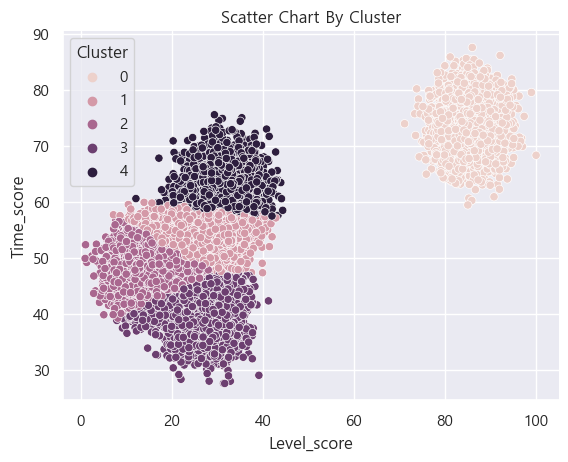

In [18]:
# 각 군집별 Level_score와 Time_score를 산포도로 시각화
ax = sns.scatterplot(data=customer_data, x='Level_score', y='Time_score', hue='Cluster')
plt.title('Scatter Chart By Cluster')
plt.show()

In [19]:
# 시각화를 위해 temp_var의 결과값을 전처리합니다.
temp_var.index = temp_var.index.tolist()
temp_var = temp_var.reset_index()
temp_var = temp_var.rename(columns = {'index':'Cluster'})
temp_var

,Cluster,Time_score,Level_score,Payment
0,0,73.6,85.7,1019.3
1,1,54.4,27.8,913.2
2,2,47.8,14.6,877.0
3,3,40.2,27.4,989.5
4,4,62.6,31.3,1025.3


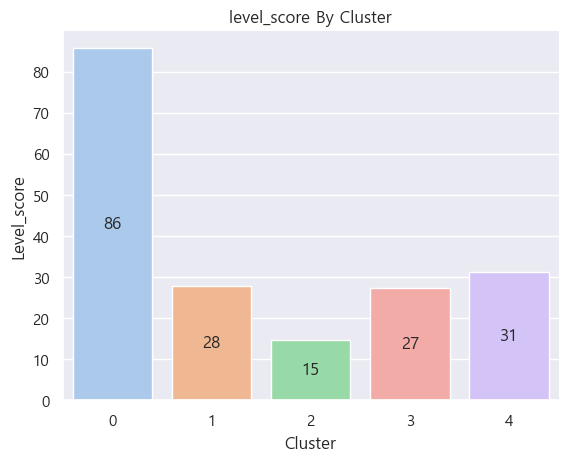

In [21]:
# 각 Cluster별 평균 Level_score를 시각화합니다.
ax = sns.barplot(data=temp_var, x='Cluster', y='Level_score')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('level_score By Cluster')
plt.show()

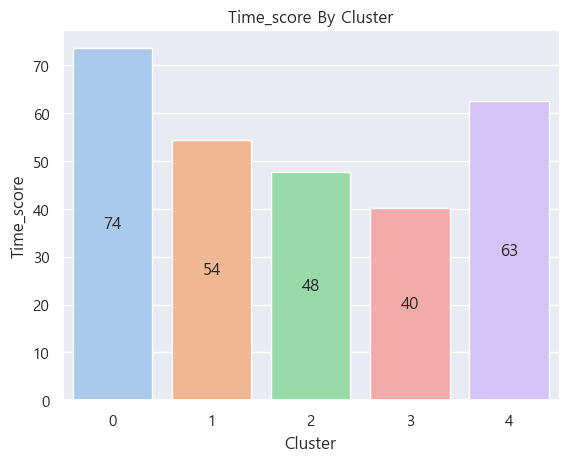

In [22]:
# 각 Cluster별 평균 Time_score를 시각화합니다.
ax = sns.barplot(data=temp_var, x='Cluster', y='Time_score')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Time_score By Cluster')
plt.show()

In [23]:
corr_data = customer_data[['Time_score', 'PK', 'BOSS', 'Gacha', 'Attack', 'Mining']].corr().round(2)
corr_data

,Time_score,PK,BOSS,Gacha,Attack,Mining
Time_score,1.00,0.32,0.06,-0.08,0.08,0.63
PK,0.32,1.00,0.65,0.05,-0.14,0.24
BOSS,0.06,0.65,1.00,-0.17,0.02,-0.08
Gacha,-0.08,0.05,-0.17,1.00,-0.69,-0.05
Attack,0.08,-0.14,0.02,-0.69,1.00,0.06
Mining,0.63,0.24,-0.08,-0.05,0.06,1.00


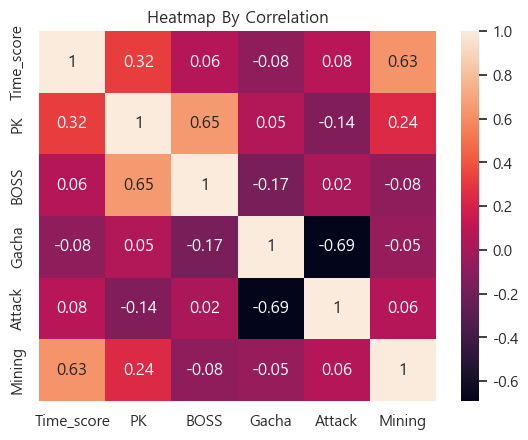

In [34]:
sns.heatmap(data = corr_data, annot=True)
plt.title('Heatmap By Correlation')
plt.show()

In [35]:
temp_var2 = customer_data.groupby('Cluster').agg({'PK': 'mean', 'BOSS':'mean', 'Gacha':'mean', 'Attack':'mean', 'Mining':'mean'}).round(1)
temp_var2

,PK,BOSS,Gacha,Attack,Mining
Cluster,,,,,
0,54.7,59.1,49.0,45.4,70.9
1,36.5,56.9,53.9,40.6,44.3
2,36.6,56.8,53.9,40.7,44.4
3,36.2,56.8,53.8,40.6,44.3
4,36.5,56.8,54.5,40.3,44.1


In [36]:
temp_var.index = temp_var.index.tolist()
temp_var = temp_var.reset_index(drop=True)
temp_var

,Cluster,Time_score,Level_score,Payment
0,0,73.6,85.7,1019.3
1,1,54.4,27.8,913.2
2,2,47.8,14.6,877.0
3,3,40.2,27.4,989.5
4,4,62.6,31.3,1025.3


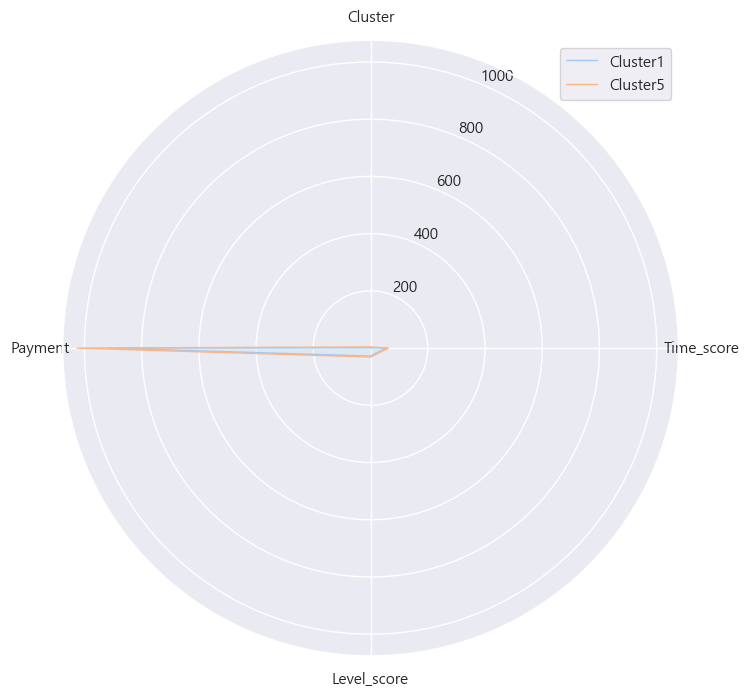

In [37]:
from math import pi

# Radar Chart의 각 방향 개수 정의
categories=list(temp_var)
N = len(categories)

# 방향변수 개수에 따른 레이더 차트 각(angle) 정의
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# 초기 레이더 차트 생성
plt.figure(figsize=(8,8)) #차트 크기
ax = plt.subplot(111, polar=True) #sub차트 생성

# 12시 방향을 기준으로 차트 생성
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# 레이더차트에 Cluster1 표기
values = temp_var.loc[1].tolist()
values.append(values[0])
ax.plot(angles, values, linewidth=1, linestyle='solid', label='Cluster1')
ax.fill(angles, values, 'b', alpha=0.1)

# 레이더차트에 Cluster5 표기
values = temp_var.loc[4].tolist()
values.append(values[0])
ax.plot(angles, values, linewidth=1, linestyle='solid', label='Cluster5')
ax.fill(angles, values, 'c', alpha=0.1)

# 각 변수이름 부여
plt.xticks(angles[:-1], categories)
plt.legend()
plt.show()